# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib notebook

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [66]:
# Checking the number of mice.
number_of_mice = mouse_study["Mouse ID"].nunique()
number_of_mice

249

In [67]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [68]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_study.loc[mouse_study['Mouse ID'] == "g989", :]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [69]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDF = mouse_study[mouse_study['Mouse ID'].isin(duplicate_mouse_data)==False]
cleanDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [70]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = cleanDF['Mouse ID'].nunique()
number_of_mice_clean

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_mean = cleanDF['Tumor Volume (mm3)'].groupby(cleanDF['Drug Regimen']).mean()
#mouse_mean
drug_median = cleanDF['Tumor Volume (mm3)'].groupby(cleanDF['Drug Regimen']).median()
#drug_median
drug_var = cleanDF['Tumor Volume (mm3)'].groupby(cleanDF['Drug Regimen']).var()
#drug_var
drug_stdev = cleanDF['Tumor Volume (mm3)'].groupby(cleanDF['Drug Regimen']).std()
#drug_stdev
drug_SEM = cleanDF['Tumor Volume (mm3)'].groupby(cleanDF['Drug Regimen']).sem()
#drug_SEM

drug_sum = pd.DataFrame({"Mean Tumor Volume": drug_mean,
                        "Median Tumor Volume": drug_median,
                        "Tumor Volume Variance": drug_var,
                        "Tumor Volume Std. Dev.": drug_stdev,
                        "Tumor Volume Std. Err.": drug_SEM})
drug_sum

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line


<IPython.core.display.Javascript object>


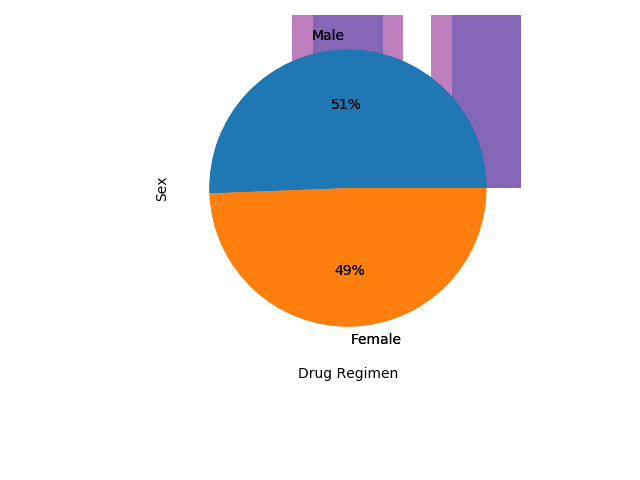

In [73]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mice_count = cleanDF['Drug Regimen'].value_counts()
panda_bar = mice_count.plot(kind="bar", color="skyblue")

plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurement")
plt.tight_layout()
plt.show()

In [75]:
values_drugregimen = mouse_study.groupby(["Drug Regimen"]).count()["Mouse ID"]
#values_drugregimen
#Capomulin    230
#Ceftamin     178
#Infubinol    178
#Ketapril     188
#Naftisol     186
#Placebo      181
#Propriva     161
#Ramicane     228
#Stelasyn     181
#Zoniferol    182

values_drugregimen_array = [230, 228, 188, 186, 182, 181, 181, 178, 178, 161]
x_axis = np.arange(len(mice_count))

plt.bar(x_axis, values_drugregimen_array, color="purple", alpha=0.5, align='center')
tick_loc = [value for value in x_axis]
plt.xticks(tick_loc, ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Ceftamin',
                     'Infubinol', 'Propriva'], rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(values_drugregimen_array)+10)

plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.tight_layout()
plt.show()

# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_mouse = cleanDF["Sex"].value_counts()
gender_mouse.plot.pie(autopct= "%1.0f%%")
plt.show()

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
size = [49.39250, 50.60750]
gender_mouse.plot.pie(autopct= "%1.0f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [124]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#.loc
capomulin = cleanDF.loc[cleanDF["Drug Regimen"] == "Capomulin",:]
#capomulin
ramicane = cleanDF.loc[cleanDF["Drug Regimen"] == "Ramicane",:]
#ramicane
infubinol = cleanDF.loc[cleanDF["Drug Regimen"] == "Infubinol",:]
#infubinol
ceftamin = cleanDF.loc[cleanDF["Drug Regimen"] == "Ceftamin",:]
#ceftamin


# Start by getting the last (greatest) timepoint for each mouse
capo_greattp = capomulin.groupby('Mouse ID').max()['Timepoint']
rami_greattp = ramicane.groupby('Mouse ID').max()['Timepoint']
infu_greattp = infubinol.groupby('Mouse ID').max()['Timepoint']
ceta_greattp = ceftamin.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Individual dataframes within the four:
cp_df = pd.DataFrame(capo_greattp)
rm_df = pd.DataFrame(rami_greattp)
in_df = pd.DataFrame(infu_greattp)
ct_df = pd.DataFrame(ceta_greattp)

#capomulin

In [113]:
#Merged DF according to drug regimen
cp_merge = pd.merge(cp_df, cleanDF, on=("Mouse ID", "Timepoint"), how='left')
rm_merge = pd.merge(rm_df, cleanDF, on=('Mouse ID', 'Timepoint'), how='left')
in_merge = pd.merge(in_df, cleanDF, on=('Mouse ID', 'Timepoint'), how='left')
ct_merge = pd.merge(ct_df, cleanDF, on=('Mouse ID', 'Timepoint'), how='left')

cp_tum = cp_merge['Tumor Volume (mm3)']
rm_tum = rm_merge['Tumor Volume (mm3)']
in_tum = in_merge['Tumor Volume (mm3)']
ct_tum = ct_merge['Tumor Volume (mm3)']

In [122]:
#Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.
#https://ucsd.bootcampcontent.com/UCSD-Coding-Bootcamp/ucsd-sd-virt-data-pt-02-2021-u-c/-/blob/master/01-Lesson-Plans/05-Matplotlib/3/Activities/02-Ins_Quartiles_and_Outliers/Solved/samples.ipynb

#Capomulin
cp_quartiles = cp_tum.quantile([.25,.5,.75])
cp_lowerq = cp_quartiles[.25]
cp_upperq = cp_quartiles[.75]
cp_iqr = cp_upperq-cp_lowerq

cp_low_out = cp_lowerq - (1.5*cp_iqr)
cp_high_out = cp_upperq - (1.5*cp_iqr)

#Ramicane
rm_quartiles = rm_tum.quantile([.25,.5,.75])
rm_lowerq = rm_quartiles[.25]
rm_upperq = rm_quartiles[.75]
rm_iqr = rm_upperq-rm_lowerq

rm_low_out = rm_lowerq - (1.5*rm_iqr)
rm_high_out = rm_upperq - (1.5*rm_iqr)

#Infubinol
in_quartiles = in_tum.quantile([.25,.5,.75])
in_lowerq = in_quartiles[.25]
in_upperq = in_quartiles[.75]
in_iqr = in_upperq-in_lowerq

in_low_out = in_lowerq - (1.5*in_iqr)
in_high_out = in_upperq - (1.5*in_iqr)

#Ceftamin
ct_quartiles = ct_tum.quantile([.25,.5,.75])
ct_lowerq = ct_quartiles[.25]
ct_upperq = ct_quartiles[.75]
ct_iqr = ct_upperq-ct_lowerq

ct_low_out = ct_lowerq - (1.5*ct_iqr)
ct_high_out = ct_upperq - (1.5*ct_iqr)

In [123]:
#Print statements
print("-------------------------CAPOMULIN---------------------------------")
print(f"The lower quartile of Capomulin treatments is: {cp_lowerq}")
print(f"The upper quartile of Capomulin treatments is: {cp_upperq}")
print(f"The interquartile range of Capomulin treatments is: {cp_iqr}")
print(f"Values below {cp_low_out} could be Capomulin outliers.")
print(f"Values above {cp_high_out} could be Capomulin outliers.")
print("--------------------------------------------------------------------")
      
print("-------------------------RAMICANE----------------------------------")
print(f"The lower quartile of Ramicane treatments is: {rm_lowerq}")
print(f"The upper quartile of Ramicane treatments is: {rm_upperq}")
print(f"The interquartile range of Ramicane treatments is: {rm_iqr}")
print(f"Values below {rm_low_out} could be Ramicane outliers.")
print(f"Values above {rm_high_out} could be Ramicane outliers.")
print("--------------------------------------------------------------------")
      
      
print("-------------------------INFUBINOL---------------------------------")
print(f"The lower quartile of Infubinol treatments is: {in_lowerq}")
print(f"The upper quartile of Infubinol treatments is: {in_upperq}")
print(f"The interquartile range of Infubinol treatments is: {in_iqr}")
print(f"Values below {in_low_out} could be Infubinol outliers.")
print(f"Values above {in_high_out} could be Infubinol outliers.")
print("--------------------------------------------------------------------")
      
      
print("-------------------------CEFTAMIN---------------------------------")
print(f"The lower quartile of Ceftamin treatments is: {ct_lowerq}")
print(f"The upper quartile of Ceftamin treatments is: {ct_upperq}")
print(f"The interquartile range of Ceftamin treatments is: {ct_iqr}")
print(f"Values below {ct_low_out} could be Ceftamin outliers.")
print(f"Values above {ct_high_out} could be Ceftamin outliers.")
print("--------------------------------------------------------------------")


-------------------------CAPOMULIN---------------------------------
The lower quartile of Capomulin treatments is: 32.37735684
The upper quartile of Capomulin treatments is: 40.1592203
The interquartile range of Capomulin treatments is: 7.781863460000004
Values below 20.70456164999999 could be Capomulin outliers.
Values above 28.486425109999995 could be Capomulin outliers.
--------------------------------------------------------------------
-------------------------RAMICANE----------------------------------
The lower quartile of Ramicane treatments is: 31.56046955
The upper quartile of Ramicane treatments is: 40.65900627
The interquartile range of Ramicane treatments is: 9.098536719999998
Values below 17.912664470000003 could be Ramicane outliers.
Values above 27.01120119 could be Ramicane outliers.
--------------------------------------------------------------------
-------------------------INFUBINOL---------------------------------
The lower quartile of Infubinol treatments is: 54.04

<IPython.core.display.Javascript object>


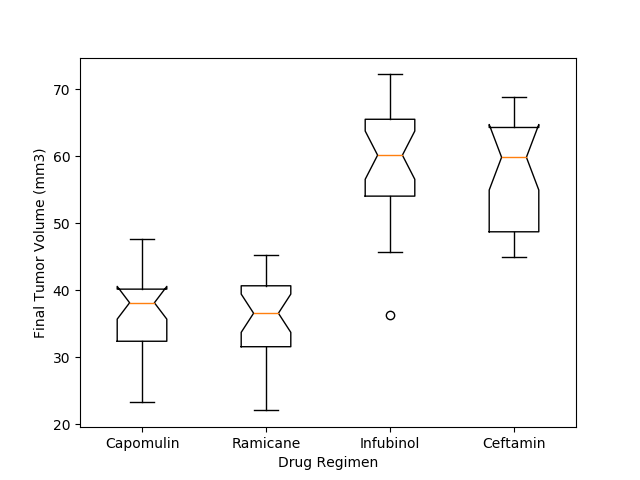

In [82]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drug_plot = [cp_tum, rm_tum, in_tum, ct_tum]
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
fig1, ax1 =plt.subplots()
plt.boxplot(drug_plot, labels=labels, widths = 0.4, notch=True, vert=True)


ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


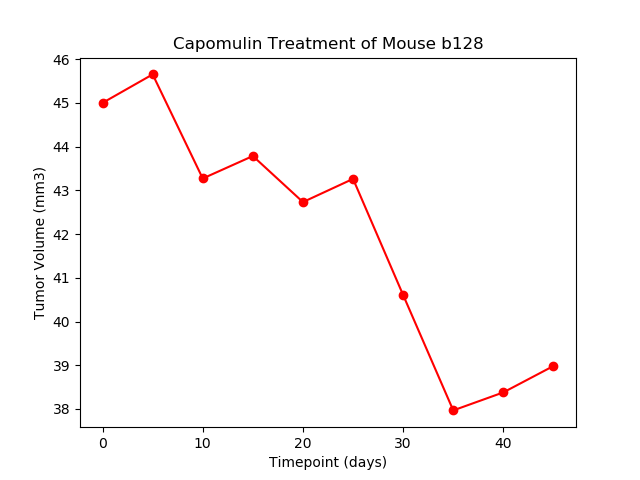

In [93]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cp_line = capomulin.loc[capomulin['Mouse ID'] == "b128",:]


xaxis = cp_line["Timepoint"]
tumor = cp_line["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.plot(xaxis, tumor, color="red", marker="o")
plt.title("Capomulin Treatment of Mouse b128")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

<IPython.core.display.Javascript object>


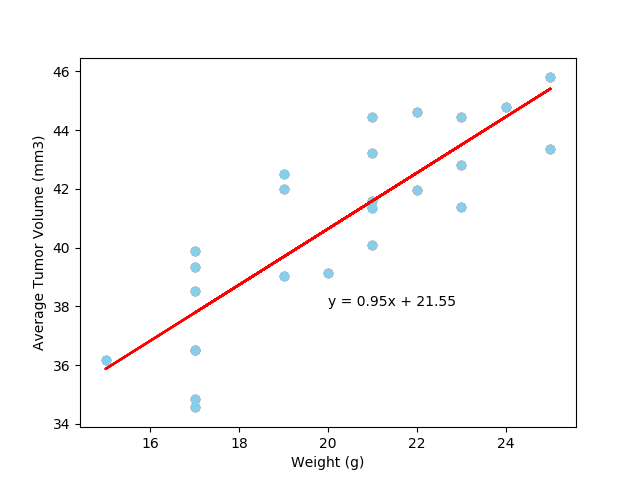

In [94]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_cp_vol =capomulin.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_cp_vol['Weight (g)'],avg_cp_vol['Tumor Volume (mm3)'], color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [105]:
# Calculate the correlation coefficient and linear regression model 
from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_cp_vol["Weight (g)"], avg_cp_vol["Tumor Volume (mm3)"])
regress = avg_cp_vol["Weight (g)"] * slope + intercept
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(avg_cp_vol["Weight (g)"], regress, color='red')
plt.annotate(equation, (20,38))


plt.show()

In [106]:
# for mouse weight and average tumor volume for the Capomulin regimen
corr_avgtum = st.pearsonr(avg_cp_vol['Weight (g)'],avg_cp_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(corr_avgtum[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84
